# DL Tutorial Day 14

## Batch vs. Stochastic vs. Mini-Batch Gradient Descent
We can perform the gradient descent algorithm by choosing the number of samples we use during the forward pass. These are divided into three types:
1. Batch Gradient Descent
We train the model on the entire dataset and update the weights at the end of the epoch. This results in a smoother convergence and is preferred for smaller datasets.
2. Stochastic Batch Gradient Descent
We randomly pick one sample, complete the forward pass and then update the weights. We following this scheme for each sample. This result in an erratic convergence and it is preferred when our dataset is very large. It might happen that the model takes a lot of time before converging.
3. Mini-Batch Gradient Descent
We randomly pick a subset of the total dataset and complete the first pass and then update the weights. The convergence pattern and time lies somewhat between batch and stochastic gradient descent.

In [61]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('homeprices.csv')
df.head()
len(df)

20

In [62]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler as mms
sx = mms()
sy = mms()
X_scaled = sx.fit_transform(df.drop('price', axis = 1))
y_scaled = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

### Batch Gradient Descent

In [63]:
# implementing batch gradient descent
def batch_gd(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []

    for i in range (epochs):
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_true-y_predicted))

        cost_list.append(cost)
        epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list =  batch_gd(
    X_scaled, 
    y_scaled.reshape(y_scaled.shape[0],), 
    500
    )
print(w, b, cost)

[0.70712464 0.67456527] -0.23034857438407427 0.0068641890429808105


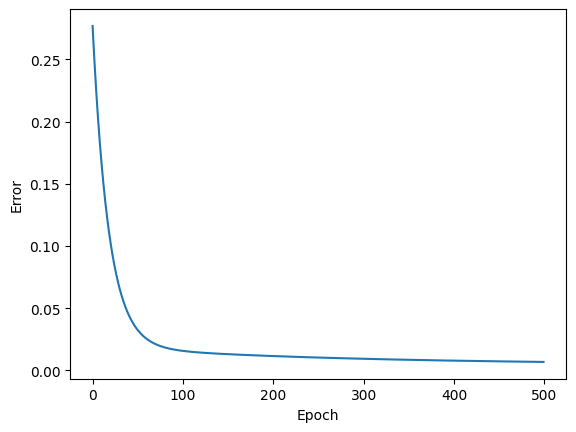

In [64]:
# plotting error vs epoch
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(epoch_list, cost_list)
plt.show()

In [65]:
# prediction function
def prediction(area, bedroom, w, b):
    X_scaled = sx.transform([[area, bedroom]])[0]
    price_scaled = w[0]*X_scaled[0] + w[1]*X_scaled[1] + b
    return sy.inverse_transform([[price_scaled]])

prediction(2600, 4, w, b)

/Users/anmoldeepsingh/.pyenv/versions/3.12.11/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

### Stochastic Gradient Descent

In [66]:
import random
def stochastic_gd(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        x_sample = X[random_index]
        y_sample = y_true[random_index]
        y_predicted = np.dot(w, x_sample.T) + b

        w_grad = -(2/total_samples)*(x_sample.T.dot(y_sample-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_sample-y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_sample-y_predicted))
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd =  stochastic_gd(
    X_scaled, 
    y_scaled.reshape(y_scaled.shape[0],), 
    10000
    )
print(w_sgd, b_sgd, cost_sgd)

[0.70712193 0.67428243] -0.23005060908434802 0.003948239666626853


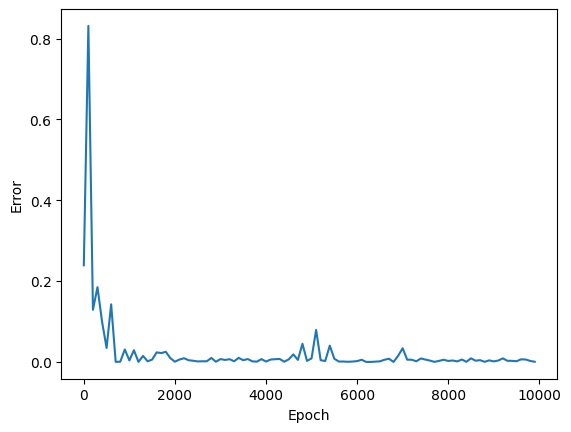

In [67]:
# plotting error vs epoch
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(epoch_list_sgd, cost_list_sgd)
plt.show()

In [68]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

### Mini-Batch Gradient Descent

In [69]:
import random
def stochastic_gd(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=number_of_features)
    b = 0
    total_samples = X.shape[0]

    rand_indices = []
    cost_list = []
    epoch_list = []

    for i in range(epochs):
        for j in range(5):
            num = random.randint(0, total_samples-1)
            rand_indices.append(num)
        # random_index = random.randint(0, total_samples-1)
        x_sample = X[rand_indices]
        y_sample = y_true[rand_indices]
        y_predicted = np.dot(w, x_sample.T) + b

        w_grad = -(2/total_samples)*(x_sample.T.dot(y_sample-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_sample-y_predicted)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_sample-y_predicted))
        if i % 100 == 0 :
            cost_list.append(cost)
            epoch_list.append(i)
        rand_indices = []
    return w, b, cost, cost_list, epoch_list

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epoch_list_mbgd =  stochastic_gd(
    X_scaled, 
    y_scaled.reshape(y_scaled.shape[0],), 
    10000
    )
print(w_mbgd, b_mbgd, cost_mbgd)

[0.68481753 0.51179822] -0.13446878099006926 0.004491648535101294


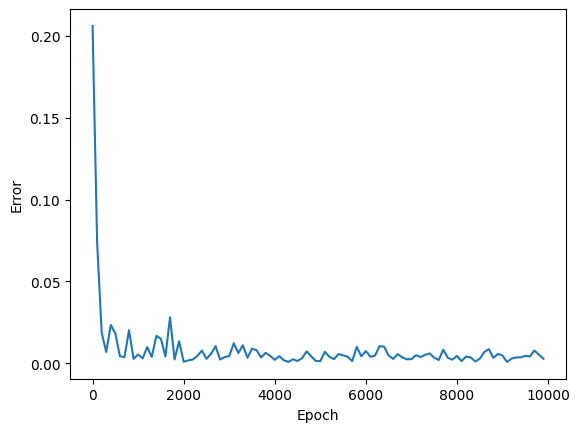

In [70]:
# plotting error vs epoch
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.plot(epoch_list_mbgd, cost_list_mbgd)
plt.show()